## Load and clean data

In [2]:
import pandas as pd


participants1 = pd.read_csv('Datasets/Activity Logs/ParticipantStatusLogs1.csv')
participants2 = pd.read_csv('Datasets/Activity Logs/ParticipantStatusLogs2.csv')
participants1.drop(['hungerStatus', 'sleepStatus', 'apartmentId', 'availableBalance', 'jobId', 'financialStatus', 'dailyFoodBudget', 'weeklyExtraBudget'], axis=1, inplace=True)
participants2.drop(['hungerStatus', 'sleepStatus', 'apartmentId', 'availableBalance', 'jobId', 'financialStatus', 'dailyFoodBudget', 'weeklyExtraBudget'], axis=1, inplace=True)

filtered_participant1 = participants1[participants1['participantId'] == 0]
filtered_participant2 = participants1[participants1['participantId'] == 1]

filtered_participant1_2 = participants2[participants2['participantId'] == 0]
filtered_participant2_2 = participants2[participants2['participantId'] == 1]

filtered_participant1 = filtered_participant1.append(filtered_participant1_2)
filtered_participant2 = filtered_participant2.append(filtered_participant2_2)


# filtered_participant1.to_csv('Datasets/Cleaned/ParticipantStatusLogs0.csv', index=False)
# filtered_participant2.to_csv('Datasets/Cleaned/ParticipantStatusLogs1.csv', index=False)










/var/folders/5b/lx_h1w013634ddq6xwrjnf500000gn/T/ipykernel_85123/4054335030.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_participant1 = filtered_participant1.append(filtered_participant1_2)
/var/folders/5b/lx_h1w013634ddq6xwrjnf500000gn/T/ipykernel_85123/4054335030.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_participant2 = filtered_participant2.append(filtered_participant2_2)


In [11]:
from shapely.wkt import loads

df = pd.read_csv('Datasets/Attributes/Buildings.csv')
df.drop(['buildingId', 'buildingType', 'maxOccupancy', 'units'], axis=1, inplace=True)

def parse_polygon(polygon_str):
    return loads(polygon_str)

# Apply the function to create a new column with Shapely geometries
df['geometry'] = df['location'].apply(parse_polygon)

# Extract extents using the bounds attribute
df['min_x'] = df['geometry'].apply(lambda geom: geom.bounds[0])
df['min_y'] = df['geometry'].apply(lambda geom: geom.bounds[1])
df['max_x'] = df['geometry'].apply(lambda geom: geom.bounds[2])
df['max_y'] = df['geometry'].apply(lambda geom: geom.bounds[3])

# Create a new DataFrame with the extents
extents_df = df[['min_x', 'min_y', 'max_x', 'max_y']]

min_values = extents_df.min(axis=0)
max_values = extents_df.max(axis=0)

print(min_values)
print(max_values)


min_x   -4762.190669
min_y     -30.083591
max_x   -4640.735188
max_y      74.405547
dtype: float64
min_x    2610.000000
min_y    7806.354912
max_x    2650.000000
max_y    7850.037195
dtype: float64


/var/folders/5b/lx_h1w013634ddq6xwrjnf500000gn/T/ipykernel_99118/1525347357.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['timestamp'].dt.to_period('M')


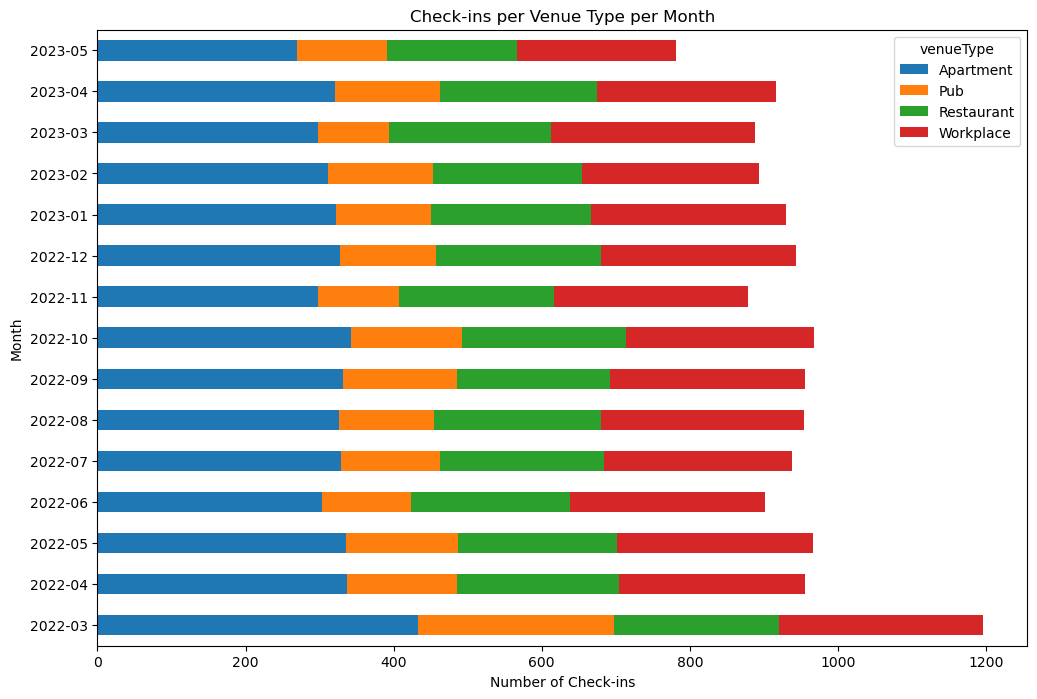